In [1]:
### Dataset Link - https://drive.google.com/file/d/136Yj_8l01EtMP5YMy7Q7XukTDEJCFGKA/view?usp=sharing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("/content/income.csv")
data.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['Age'] = scaler.fit_transform(data[['Age']])
data['Income($)'] = scaler.fit_transform(data[['Income($)']])

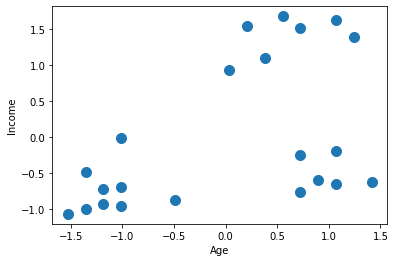

In [5]:
plt.scatter(data['Age'],data['Income($)'],s=100)
plt.xlabel("Age")
plt.ylabel("Income")
plt.show()

In [6]:
x = data[['Age','Income($)']]
x

,Age,Income($)
0,-1.356055,-0.480684
1,-1.009157,-0.010159
2,-1.009157,-0.692421
3,-1.182606,-0.715947
4,1.245679,1.401417
5,0.725332,1.519048
6,1.072230,1.636679
7,0.551883,1.683732
8,0.204985,1.542574
9,0.031536,0.930891


In [7]:
#### Plot Dendrogram

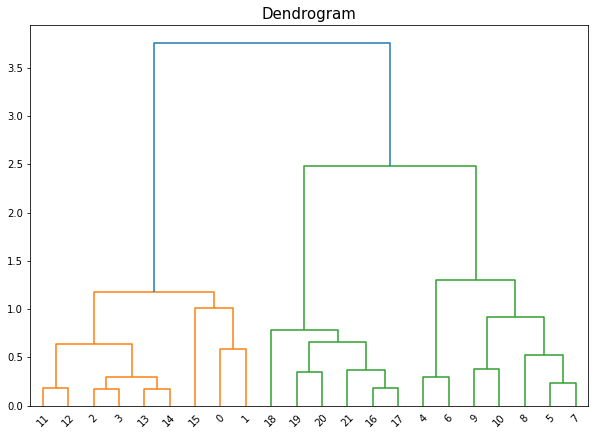

In [8]:
import scipy.cluster.hierarchy as sch
plt.figure(figsize = (10,7))
dendrogram = sch.dendrogram(sch.linkage(x,method='complete'))  ## method - complete,average,ward,single
plt.title("Dendrogram",fontsize=15)
plt.show()

In [9]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3,linkage='complete',affinity='euclidean')
cl = cluster.fit_predict(x)
cl

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [10]:
x['Cluster'] = cl
x

,Age,Income($),Cluster
0,-1.356055,-0.480684,1
1,-1.009157,-0.010159,1
2,-1.009157,-0.692421,1
3,-1.182606,-0.715947,1
4,1.245679,1.401417,0
5,0.725332,1.519048,0
6,1.072230,1.636679,0
7,0.551883,1.683732,0
8,0.204985,1.542574,0
9,0.031536,0.930891,0


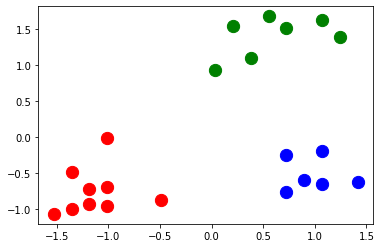

In [11]:
df1 = x[x['Cluster']==0]
df2 = x[x['Cluster']==1]
df3 = x[x['Cluster']==2]
plt.scatter(df1['Age'],df1['Income($)'],color='green',label="Cluster 1",s=150)
plt.scatter(df2['Age'],df2['Income($)'],color='red',label="Cluster 2",s=150)
plt.scatter(df3['Age'],df3['Income($)'],color='blue',label="Cluster 3",s=150)
plt.show()